# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [9]:
# Load .env enviroment variables
load_dotenv('C:\\Users\Dave Family\Desktop\Trilogy\myFinTech\apihw2.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [10]:
os.getenv('ALPACA_API_KEY')

'AK1YEHD78KAMCIYKFH6V'

In [11]:
# Set current amount of crypto assets
my_btc=2
my_eth=50


In [12]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [13]:
# Fetch current BTC price
btc_response=requests.get(btc_url)

# Fetch current ETH price
eth_response=requests.get(eth_url)

# Compute current value of my crpto
#pprint(btc_price.json())
btc_price=btc_response.json()['data']['1']['quotes']['USD']['price']
#pprint(eth_price.json())

eth_price=eth_response.json()['data']['1027']['quotes']['USD']['price']

my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

# The current value of your 2 BTC is $10000")

The current value of your 2 BTC is $117756.00
The current value of your 50 ETH is $98557.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Current amount of shares
my_spy=20

my_agg=35

In [15]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")

In [51]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# alpaca_api_key ="AK1YEHD78KAMCIYKFH6V"
print(type(alpaca_api_key))
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# alpaca_secret_key="bZ5KEEsXuIwfzG0ZMl4PVbQe7iREhCZqoqWH1nJc"
print(type(alpaca_secret_key))
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

<class 'str'>
<class 'str'>


In [77]:
# Format current date as ISO format
current = pd.Timestamp("2021-03-27", tz="America/New_York").isoformat()
print(current)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

current_price = alpaca.get_barset(
    tickers,
    timeframe,
    start = start, 
    end = end, 
).df


# Preview DataFrame
current_price

2021-03-27T00:00:00-04:00


AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-02-21 00:00:00-05:00  114.86  115.1000  114.8400  114.910  3805815   
2020-02-24 00:00:00-05:00  115.43  115.4300  115.2300  115.270  7008307   
2020-02-25 00:00:00-05:00  115.28  115.5800  115.2700  115.470  6935476   
2020-02-26 00:00:00-05:00  115.32  115.6100  115.2600  115.340  3990647   
2020-02-27 00:00:00-05:00  115.75  115.7500  115.3500  115.380  8587726   
...                           ...       ...       ...      ...      ...   
2020-07-08 00:00:00-04:00  118.35  118.4500  118.2200  118.305  3942821   
2020-07-09 00:00:00-04:00  118.40  118.7000  118.3553  118.640  3560921   
2020-07-10 00:00:00-04:00  118.83  118.8300  118.4500  118.470  2910802   
2020-07-13 00:00:00-04:00  118.46  118.5287  118.3700  118.480  4032929   
2020-07-14 00:00:00-04:00  118.58  118.7400  118.5800  118.655  3611959   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-02-21 00:00:00-05:00  335.46  335.7950  332.58  333.49   88418384  
2020-02-24 00:00:00-05:00  323.14  333.5623  321.24  322.41  127181403  
2020-02-25 00:00:00-05:00  323.94  324.6100  311.69  312.70  180541365  
2020-02-26 00:00:00-05:00  314.18  318.1100  310.70  311.55  157515903  
2020-02-27 00:00:00-05:00  305.46  311.5637  297.52  297.55  233673112  
...                           ...       ...     ...     ...        ...  
2020-07-08 00:00:00-04:00  314.61  316.3000  312.70  316.12   48519883  
2020-07-09 00:00:00-04:00  316.84  317.1000  310.68  314.42   73998876  
2020-07-10 00:00:00-04:00  314.31  317.8800  312.76  317.61   49822174  
2020-07-13 00:00:00-04:00  320.13  322.7100  314.13  314.81   87626307  
2020-07-14 00:00:00-04:00  313.30  319.7600  312.00  318.89   79292036  

[100 rows x 10 columns]

In [78]:
# Pick AGG and SPY close prices
agg_close_price = current_price["AGG"]["close"][0]
spy_close_price = current_price["SPY"]["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.91
Current SPY closing price: $333.49


In [79]:
current_price.columns

MultiIndex([('AGG',   'open'),
            ('AGG',   'high'),
            ('AGG',    'low'),
            ('AGG',  'close'),
            ('AGG', 'volume'),
            ('SPY',   'open'),
            ('SPY',   'high'),
            ('SPY',    'low'),
            ('SPY',  'close'),
            ('SPY', 'volume')],
           )

In [83]:
# Compute the current value of shares
my_agg_value = agg_close_price *my_agg
my_spy_value = spy_close_price *my_spy
# Print current value of share
print(f"The current value of my SPY shares is ${my_spy_value:.02f}")
print(f"The current value of my AGG shares is ${my_agg_value}")


The current value of my SPY shares is $6669.80
The current value of my AGG shares is $4021.85


### Savings Health Analysis

In [84]:
# Set monthly household income
monthly_income=10000

# Create savings DataFrame
savings_data=[my_agg_value, my_spy_value, monthly_income]
# Display savings DataFrame


df_savings=pd.DataFrame({'amount': savings_data}, index=['AGG', 'SPY', 'Income'])
df_savings

,amount
AGG,4021.85
SPY,6669.80
Income,10000.00


<AxesSubplot:ylabel='amount'>

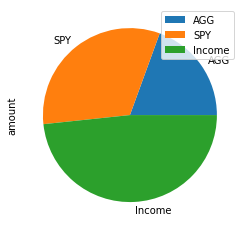

In [87]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [88]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings= emergency_fund + monthly_income
total_savings
# Validate saving health
print(f"The current amount of my savings is ${total_savings}.")

The current amount of my savings is $40000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [89]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-28', tz='America/New_York').isoformat()

ticker= ["SPY", "AGG"]

timeframe = "1D"

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

df_stock_data.head()

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535  234.95   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826  235.15   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500  235.36   
2017-04-11 00:00:00-04:00  108.76  108.98  108.7500  108.90  2054745  234.87   
2017-04-12 00:00:00-04:00  108.93  109.20  108.8900  109.14  2243678  234.74   

                                                               
                              high      low   close    volume  
time                                                           
2017-04-06 00:00:00-04:00  236.040  234.425  235.39  53559902  
2017-04-07 00:00:00-04:00  236.000  234.640  235.17  53293901  
2017-04-10 00:00:00-04:00  236.255  234.730  235.32  46610548  
2017-04-11 00:00:00-04:00  235.180  233.340  235.04  63951745  
2017-04-12 00:00:00-04:00  234.960  233.770  234.10  55338215

In [91]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

type(MC_30year.portfolio_data)

pandas.core.frame.DataFrame

In [92]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500   
2017-04-11 00:00:00-04:00  108.76  108.98  108.7500  108.90  2054745   
2017-04-12 00:00:00-04:00  108.93  109.20  108.8900  109.14  2243678   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-04-06 00:00:00-04:00          NaN  234.95  236.040  234.425  235.39   
2017-04-07 00:00:00-04:00    -0.002116  235.15  236.000  234.640  235.17   
2017-04-10 00:00:00-04:00     0.001199  235.36  236.255  234.730  235.32   
2017-04-11 00:00:00-04:00     0.003040  234.87  235.180  233.340  235.04   
2017-04-12 00:00:00-04:00     0.002204  234.74  234.960  233.770  234.10   

                                                  
                             volume daily_return  
time                                              
2017-04-06 00:00:00-04:00  53559902          NaN  
2017-04-07 00:00:00-04:00  53293901    -0.000935  
2017-04-10 00:00:00-04:00  46610548     0.000638  
2017-04-11 00:00:00-04:00  63951745    -0.001190  
2017-04-12 00:00:00-04:00  55338215    -0.003999

In [93]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005102,0.995897,0.997296,1.000772,1.000363,0.998251,0.991307,0.998446,0.996310,1.001655,...,0.998846,0.996833,1.012850,1.001032,1.002024,1.002424,1.002222,1.013229,1.001578,1.011396
2,1.008855,0.993116,0.997503,0.998585,1.003552,1.000322,0.994558,1.002261,0.993181,1.001754,...,0.997899,0.998547,1.001996,1.007370,1.007917,1.004566,1.004531,1.006663,0.993671,1.000504
3,1.010025,0.997352,0.998358,1.003919,0.999376,0.990065,0.988102,0.995424,0.996796,0.990375,...,0.996312,0.993799,1.006312,1.002509,1.011029,1.002819,0.999268,1.004703,0.988251,1.006887
4,1.013635,1.002080,0.992110,0.998511,0.994578,0.990792,0.988993,0.989328,0.995284,0.988877,...,1.003365,0.991954,1.009240,1.002293,1.009127,1.004018,0.996713,0.996362,0.985174,1.007307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.055552,16.314033,6.054531,6.654553,5.589434,12.132022,5.839372,5.434032,3.554522,6.705832,...,7.582178,13.436530,2.140216,10.021782,5.919944,20.765286,5.914031,8.698909,6.222690,9.282806
7557,5.991767,16.330142,6.121921,6.625480,5.605145,12.276827,5.838959,5.419963,3.542409,6.770946,...,7.577304,13.534966,2.145887,10.005619,5.930572,20.852337,5.906024,8.623040,6.256595,9.321117
7558,6.022334,16.209984,6.079563,6.588784,5.618216,12.236795,5.823533,5.368286,3.538556,6.817278,...,7.581770,13.466995,2.155096,10.030354,5.909617,20.988698,5.926969,8.604424,6.303710,9.376214
7559,6.003195,16.121648,6.079392,6.599730,5.587268,12.283620,5.834469,5.357836,3.522443,6.737118,...,7.569140,13.533841,2.156555,10.069448,5.954300,20.897075,5.962467,8.547734,6.271845,9.430046


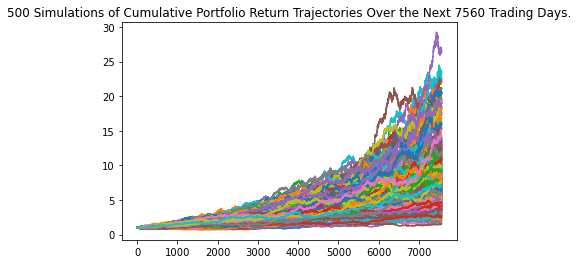

In [69]:
# Plot simulation outcomes
line_plot= MC_30year.plot_simulation()

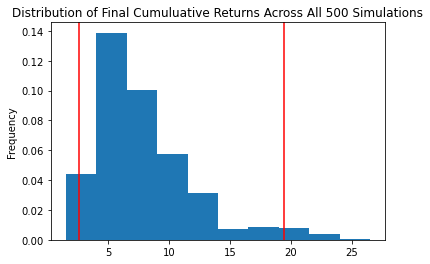

In [70]:
# Plot probability distribution and confidence intervals
dist_plot= MC_30year.plot_distribution()

### Retirement Analysis

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats =MC_30year.summarize_cumulative_return()


# Print summary statistics
print(summary_stats)

count           500.000000
mean              7.917482
std               4.088940
min               1.549077
25%               5.179156
50%               6.898396
75%               9.503310
max              26.480374
95% CI Lower      2.650719
95% CI Upper     19.451335
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [74]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper: .02f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53014.37 and $389026.7


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [76]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*30000,2)
ci_upper = round(summary_stats[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79521.56 and $583540.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

type(MC_5year.portfolio_data)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot2= MC_5year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot2= MC_5year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats2 =MC_5year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats2)

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats2[8]*60000,2)
ci_upper_five = round(summary_stats2[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

type(MC_10year.portfolio_data)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot3= MC_10year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot3= MC_10year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats3 =MC_10year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats3)

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats3[8]*60000,2)
ci_upper_ten = round(summary_stats3[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")